### Data origin
Video annotations were matched with their corresponding audio clips, called annotation audio. Each annotation audio file was scanned for high SNR calls that were free of overlap or reverberation. A single call was taken from each annotation audio and these are called the 'individual call' clips. The idea is to compare the call properties of the calls by emitted by individual bats vs groups of bats. 

The single call audio files were in turn automatically extracted from their longer annotation audio clips. The single call segments were from manually made annotations by Aditya, and the call selection (start and end time) were manually verified once more by TB in the 'Correcting and checking single call annotations' Jupyter notebook. 

The individual call measurements for each call region are from the itsfm runs performed on single calls. The single calls of each night are placed according to the corresponding video hour, and the ```itsfm``` [1] runs are performed based on the batch files for each video hour. Each ```itsfm``` batchfile run leads to a measurement file with one row for one call regions measurements. 

- Author: Thejasvi Beleyur, June 2020

In [1]:
import datetime as dt
import glob
import matplotlib.pyplot as plt
import numpy as np 
np.random.seed(82319)
import os
import natsort
import pandas as pd
import format_and_clean
from format_and_clean import ind_call_format as icf
import itsfm

In [2]:
print(f"Notebook run started at : {dt.datetime.now()}")

Notebook run started at : 2020-07-10 19:35:42.327712


In [3]:
dB = lambda X : 20*np.log10(np.abs(X))

In [4]:
%matplotlib notebook

In [5]:
manual_checked_dirs = icf.get_folders_with_manual_checks('./')
natsort.natsorted(manual_checked_dirs)

['./2018-08-16_2150-2300',
 './2018-08-16_2300-2400',
 './2018-08-17_0000-0100',
 './2018-08-17_0100-0200',
 './2018-08-17_0200-0300',
 './2018-08-17_0300-0400',
 './2018-08-17_0400-0500',
 './2018-08-17_0500-0600',
 './2018-08-19_0120-0300',
 './2018-08-19_0200-0300',
 './2018-08-20_0200-0300',
 './2018-08-20_0300-0400']

In [6]:
# load the measurement files and remove those annotations that are in the 'donot_analyse' file
all_msmts = []
for each in manual_checked_dirs:
    msmt_file = glob.glob(os.path.join(each, 'measurement*.csv'))[0]
    measurements = pd.read_csv(msmt_file)
    if 'donot_analyse.txt' in os.listdir(each):
        measurements = icf.remove_badquality_points(each, measurements)
    all_msmts.append(measurements)

In [7]:
measurements

,Unnamed: 0,audio_file,duration,peak_amplitude,peak_freq_resolution,peak_frequency,region_id,rms,start,stop,terminal_frequency,terminal_frequency_threshold
0,0,segment_matching_annotaudio_Aditya_2018-08-17_...,0.000468,0.007568,4237.288136,113247.863248,cf1,0.004037,0.000156,0.000624,104700.854701,-10
1,1,segment_matching_annotaudio_Aditya_2018-08-17_...,0.001140,0.027679,1748.251748,109649.122807,fm1,0.012428,0.000624,0.001764,107894.736842,-10
2,2,segment_matching_annotaudio_Aditya_2018-08-17_...,0.019612,0.066895,101.957586,112278.197022,cf2,0.032787,0.001764,0.021376,112227.207832,-10
3,3,segment_matching_annotaudio_Aditya_2018-08-17_...,0.000224,0.045044,8620.689655,111607.142857,fm2,0.029067,0.021376,0.021600,107142.857143,-10
4,4,segment_matching_annotaudio_Aditya_2018-08-17_...,0.000228,0.033295,8620.689655,109649.122807,cf3,0.015945,0.021600,0.021828,105263.157895,-10
...,...,...,...,...,...,...,...,...,...,...,...,...
104,0,segment_matching_annotaudio_Aditya_2018-08-17_...,0.034508,0.071411,57.950858,106178.277501,cf1,0.034629,0.000484,0.034992,105917.468413,-10
105,1,segment_matching_annotaudio_Aditya_2018-08-17_...,0.000860,0.028381,2314.814815,104651.162791,fm1,0.015586,0.034992,0.035852,95348.837209,-10
106,0,segment_matching_annotaudio_Aditya_2018-08-17_...,0.001160,0.014740,1712.328767,104310.344828,fm1,0.007327,0.001032,0.002192,97413.793103,-10
107,1,segment_matching_annotaudio_Aditya_2018-08-17_...,0.013776,0.049438,145.095763,104819.976771,cf1,0.025609,0.002192,0.015968,104674.796748,-10


In [8]:
all_msmts_df = pd.concat(all_msmts).reset_index(drop=True)

In [9]:
all_msmts_df

,Unnamed: 0,audio_file,duration,peak_amplitude,peak_freq_resolution,peak_frequency,region_id,rms,start,stop,terminal_frequency,terminal_frequency_threshold
0,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.000316,0.005859,6250.000000,69620.253165,fm1,0.002876,0.001332,0.001648,101265.822785,-10
1,1,segment_matching_annotaudio_Aditya_2018-08-20_...,0.028276,0.093628,70.721358,106026.312067,cf1,0.042218,0.001648,0.029924,105884.849342,-10
2,2,segment_matching_annotaudio_Aditya_2018-08-20_...,0.002076,0.055756,961.538462,103564.547206,fm2,0.024289,0.029924,0.032000,89595.375723,-10
3,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.001424,0.032684,1396.648045,103932.584270,fm1,0.014969,0.000920,0.002344,94101.123596,-10
4,1,segment_matching_annotaudio_Aditya_2018-08-20_...,0.014780,0.072662,135.281385,106630.581867,cf1,0.039062,0.002344,0.017124,106224.627876,-10
...,...,...,...,...,...,...,...,...,...,...,...,...
1136,0,segment_matching_annotaudio_Aditya_2018-08-17_...,0.034508,0.071411,57.950858,106178.277501,cf1,0.034629,0.000484,0.034992,105917.468413,-10
1137,1,segment_matching_annotaudio_Aditya_2018-08-17_...,0.000860,0.028381,2314.814815,104651.162791,fm1,0.015586,0.034992,0.035852,95348.837209,-10
1138,0,segment_matching_annotaudio_Aditya_2018-08-17_...,0.001160,0.014740,1712.328767,104310.344828,fm1,0.007327,0.001032,0.002192,97413.793103,-10
1139,1,segment_matching_annotaudio_Aditya_2018-08-17_...,0.013776,0.049438,145.095763,104819.976771,cf1,0.025609,0.002192,0.015968,104674.796748,-10


In [10]:
all_msmts_df['video_annot_id'] = all_msmts_df['audio_file'].apply(icf.remove_segment_matching_annotaudio_)
# remove the '_hp' from the video_annot_ida

all_msmts_df['video_annot_id'] = all_msmts_df['video_annot_id'].str.rstrip('_hp')

In [11]:
video_annot_folder = '../../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya/'
all_msmts_df['num_bats'] = icf.get_numbats_from_annotation_id(all_msmts_df['video_annot_id'], video_annot_folder)

<IPython.core.display.Javascript object>


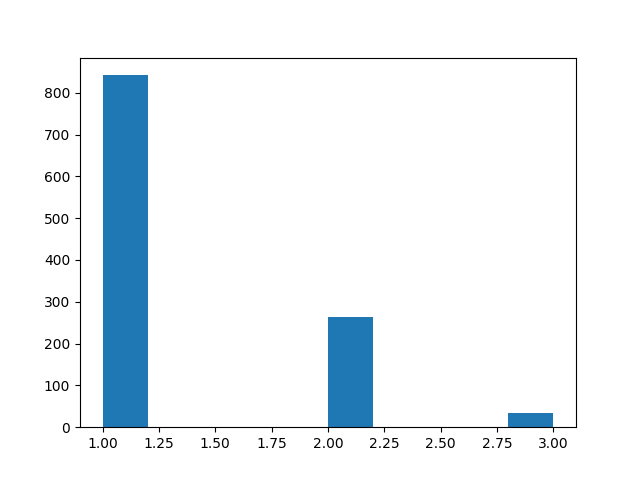

(array([842.,   0.,   0.,   0.,   0., 264.,   0.,   0.,   0.,  35.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

In [12]:
plt.figure()
plt.hist(all_msmts_df['num_bats'])

### Checking if all nights have single AND multi bat records:
This I need to do to make sure that we've squeezed out the max from the data!

In [13]:
numbats_per_day = pd.DataFrame(data=all_msmts_df['num_bats'],columns=['num_bats'])
numbats_per_day['date'] = all_msmts_df['video_annot_id'].apply(lambda X: X[7:17], 1)
grouped_bat_contexts_perday = numbats_per_day.groupby('date')

In [14]:
# print the summary stats of how many single, double and triple bat flight annotations are in the dataset.

for date, subdf in grouped_bat_contexts_perday:
    nums, counts = np.unique(subdf['num_bats'], return_counts=True)
    print(date, nums, counts)

2018-08-16 [1 2 3] [220  78   9]
2018-08-17 [1 2 3] [482 145  17]
2018-08-19 [1 2 3] [108  35   9]
2018-08-20 [1 2] [32  6]


### Confirmation: The single and multi bat annotations have been merged after the Tuebingen conference!

In [15]:
unique_ids  = all_msmts_df.groupby(['video_annot_id'])

In [16]:
annot = list(unique_ids.groups.keys())[10]
unique_ids.get_group(annot)

,Unnamed: 0,audio_file,duration,peak_amplitude,peak_freq_resolution,peak_frequency,region_id,rms,start,stop,terminal_frequency,terminal_frequency_threshold,video_annot_id,num_bats
319,0,segment_matching_annotaudio_Aditya_2018-08-16_...,0.000816,0.012207,2427.184466,106617.647059,fm1,0.006330,0.000100,0.000916,99264.705882,-10,Aditya_2018-08-16_21502300_20,2
320,1,segment_matching_annotaudio_Aditya_2018-08-16_...,0.017800,0.031921,112.309075,108651.685393,cf1,0.014608,0.000916,0.018716,108539.325843,-10,Aditya_2018-08-16_21502300_20,2
321,2,segment_matching_annotaudio_Aditya_2018-08-16_...,0.001496,0.043518,1329.787234,97593.582888,fm2,0.017439,0.018716,0.020212,89572.192513,-10,Aditya_2018-08-16_21502300_20,2


In [17]:
poorly_seg_calls = ['Aditya_2018-08-16_21502300_100', 'Aditya_2018-08-16_21502300_102', 'Aditya_2018-08-16_21502300_19',
          'Aditya_2018-08-16_2324_14', 'Aditya_2018-08-16_2324_148', 'Aditya_2018-08-16_2324_154', 'Aditya_2018-08-16_2324_197',
          'Aditya_2018-08-16_2324_207', 'Aditya_2018-08-16_2324_223', 'Aditya_2018-08-16_2324_230', 'Aditya_2018-08-16_2324_258',
          'Aditya_2018-08-16_2324_28','Aditya_2018-08-16_2324_68', 'Aditya_2018-08-16_2324_90', 'Aditya_2018-08-16_2324_94',
          'Aditya_2018-08-17_01_15', 'Aditya_2018-08-17_01_28', 'Aditya_2018-08-17_01_29', 'Aditya_2018-08-17_01_35',
          'Aditya_2018-08-17_01_40', 'Aditya_2018-08-17_01_46', 'Aditya_2018-08-17_01_60', 'Aditya_2018-08-17_01_80',
          'Aditya_2018-08-17_01_81', 'Aditya_2018-08-17_12_100', 'Aditya_2018-08-17_12_108', 'Aditya_2018-08-17_12_110',
          'Aditya_2018-08-17_12_117','Aditya_2018-08-17_12_121', 'Aditya_2018-08-17_12_76',
          'Aditya_2018-08-17_34_40', 'Aditya_2018-08-17_34_65','Aditya_2018-08-17_34_71', 'Aditya_2018-08-17_34_72',
          'Aditya_2018-08-17_45_116','Aditya_2018-08-17_45_126', 'Aditya_2018-08-17_45_127',
          'Aditya_2018-08-17_45_173','Aditya_2018-08-17_45_200', 'Aditya_2018-08-17_45_203', 'Aditya_2018-08-17_45_269',
          'Aditya_2018-08-17_45_29', 'Aditya_2018-08-17_45_337', 'Aditya_2018-08-17_45_342', 'Aditya_2018-08-19_0120-0200_110',
          'Aditya_2018-08-19_0120-0200_112', 'Aditya_2018-08-19_0120-0200_59',
          'Aditya_2018-08-19_0120-0200_90', 'Aditya_2018-08-19_23_16', 'Aditya_2018-08-19_23_17',
          'Aditya_2018-08-19_23_18', 'Aditya_2018-08-19_23_39', 'Aditya_2018-08-20_0300-0400_56',
          'Aditya_2018-08-17_23_111','Aditya_2018-08-17_23_133','Aditya_2018-08-17_23_14',
          'Aditya_2018-08-17_23_145','Aditya_2018-08-17_23_15', 'Aditya_2018-08-17_23_173',
          'Aditya_2018-08-17_23_196','Aditya_2018-08-17_23_56', 'Aditya_2018-08-17_23_70',
          'Aditya_2018-08-17_23_84',
          ]

df = all_msmts_df.copy()
for each in poorly_seg_calls:
    df = df[df['video_annot_id'] != each]

icf.make_one_row_per_call(df)

/home/tbeleyur/Documents/packages_dev/match_audio_to_video/experimental_testdata/horseshoebat_data/individual_call_analysis/analysis/format_and_clean/ind_call_format.py:305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_wide_formatted[each] = time_sorted[each][0]


,ifm_terminal_frequency,ifm_peak_amplitude,ifm_region_id,ifm_stop,ifm_duration,ifm_rms,ifm_peak_frequency,ifm_start,ifm_peak_freq_resolution,cf_terminal_frequency,...,tfm_peak_frequency,tfm_start,tfm_peak_freq_resolution,audio_file,terminal_frequency_threshold,video_annot_id,num_bats,0,duration,peak_freq_resolution
0,102803.738318,0.019897,fm1,0.002048,0.000428,0.009964,107476.635514,0.001620,4629.629630,107869.142352,...,91098.169717,0.020144,830.564784,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_101,1,NaN,NaN,NaN
1,95756.880734,0.263123,fm1,0.002412,0.001744,0.149708,103211.009174,0.000668,1141.552511,106966.145833,...,102966.841187,0.017772,871.080139,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_104,1,NaN,NaN,NaN
2,99856.321839,0.043701,fm1,0.002440,0.001392,0.016833,104885.057471,0.001048,1428.571429,107272.982063,...,107416.879795,0.016712,1275.510204,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_106,1,NaN,NaN,NaN
3,99326.599327,0.022827,fm1,0.001236,0.001188,0.011683,106060.606061,0.000048,1677.852349,106701.940035,...,103195.164076,0.014844,862.068966,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_108,1,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105383.926573,...,102699.530516,0.018824,1168.224299,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_110,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,85294.117647,0.008911,fm1,0.000448,0.000340,0.004141,102941.176471,0.000108,5813.953488,102085.781434,...,102582.496413,0.014064,716.332378,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_61,1,NaN,NaN,NaN
298,86580.086580,0.036652,fm1,0.002216,0.001848,0.017552,89826.839827,0.000368,1077.586207,101832.399627,...,87772.397094,0.019352,1207.729469,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_85,1,NaN,NaN,NaN
299,93342.036554,0.027985,fm1,0.001984,0.001532,0.016604,95953.002611,0.000452,1302.083333,105600.539811,...,104343.220339,0.013840,1054.852321,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_90,1,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105111.008326,...,99264.705882,0.018868,915.750916,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_91,1,NaN,NaN,NaN


### Temporarily poorly segmented calls:
The 'odd' calls are all those that don't satisfy the typical conditions for a horseshoebat call, ie. max 3 call segments, max 1 CF and max 2 FM segments. The reason the 'odd' calls don't satisfy the conditions is just because some calls have a 'hooked' FM segment. These hooks are segmented sometimes as an FM + CF segment, or even FM+CF+FM segments, which makes those calls seem odd. These calls will be manually verified once more and then added back into the main dataset.

In [18]:
len(poorly_seg_calls)

63

In [19]:
# save the problem calls into a csv file for further processing in the'Handling badly segmented horseshoe bat calls'
# ntoebook
problem_calls_df = pd.DataFrame(data=poorly_seg_calls, columns=['odd_calls'])
problem_calls_df.to_csv('poorly_segmented_calls.csv')

odd_df = all_msmts_df.copy()
odd_call = []
for each in poorly_seg_calls:
    match = odd_df[odd_df['video_annot_id'] == each]
    if match.shape[0] == 0:
        raise ValueError(f'Something is wrong, couldnt find annotation: {each}')
    odd_call.append(match)

odd_calls_w_regions = pd.concat(odd_call).reset_index(drop=True)
odd_calls_w_regions.to_csv('odd_calls_msmts.csv')



In [20]:
all_msmts_df[all_msmts_df['video_annot_id'] == each]

,Unnamed: 0,audio_file,duration,peak_amplitude,peak_freq_resolution,peak_frequency,region_id,rms,start,stop,terminal_frequency,terminal_frequency_threshold,video_annot_id,num_bats
587,0,segment_matching_annotaudio_Aditya_2018-08-17_...,0.001388,0.015137,1436.781609,100144.092219,fm1,0.005383,0.000336,0.001724,92219.020173,-10,Aditya_2018-08-17_23_84,1
588,1,segment_matching_annotaudio_Aditya_2018-08-17_...,0.013916,0.027802,143.678161,102256.395516,cf1,0.013947,0.001724,0.015640,102040.816327,-10,Aditya_2018-08-17_23_84,1
589,2,segment_matching_annotaudio_Aditya_2018-08-17_...,0.000192,0.022827,10000.000000,98958.333333,fm2,0.012798,0.015640,0.015832,93750.000000,-10,Aditya_2018-08-17_23_84,1
590,3,segment_matching_annotaudio_Aditya_2018-08-17_...,0.002552,0.024292,781.250000,102272.727273,cf2,0.010570,0.015832,0.018384,101489.028213,-10,Aditya_2018-08-17_23_84,1
591,4,segment_matching_annotaudio_Aditya_2018-08-17_...,0.001860,0.019073,1072.961373,103225.806452,fm3,0.006832,0.018384,0.020244,91935.483871,-10,Aditya_2018-08-17_23_84,1


In [21]:
print(len(np.unique(odd_calls_w_regions['video_annot_id'])))


63


### Let's now remove these poorly segmented calls from the dataset first. 

In [22]:
wo_poorly_segmented_calls = all_msmts_df.copy()
for each in wo_poorly_segmented_calls:
    wo_poorly_segmented_calls = df[df['video_annot_id'] != each]

In [23]:
wo_poorly_segmented_calls

,Unnamed: 0,audio_file,duration,peak_amplitude,peak_freq_resolution,peak_frequency,region_id,rms,start,stop,terminal_frequency,terminal_frequency_threshold,video_annot_id,num_bats
0,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.000316,0.005859,6250.000000,69620.253165,fm1,0.002876,0.001332,0.001648,101265.822785,-10,Aditya_2018-08-20_0300-0400_18,2
1,1,segment_matching_annotaudio_Aditya_2018-08-20_...,0.028276,0.093628,70.721358,106026.312067,cf1,0.042218,0.001648,0.029924,105884.849342,-10,Aditya_2018-08-20_0300-0400_18,2
2,2,segment_matching_annotaudio_Aditya_2018-08-20_...,0.002076,0.055756,961.538462,103564.547206,fm2,0.024289,0.029924,0.032000,89595.375723,-10,Aditya_2018-08-20_0300-0400_18,2
3,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.001424,0.032684,1396.648045,103932.584270,fm1,0.014969,0.000920,0.002344,94101.123596,-10,Aditya_2018-08-20_0300-0400_19,1
4,1,segment_matching_annotaudio_Aditya_2018-08-20_...,0.014780,0.072662,135.281385,106630.581867,cf1,0.039062,0.002344,0.017124,106224.627876,-10,Aditya_2018-08-20_0300-0400_19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,0,segment_matching_annotaudio_Aditya_2018-08-17_...,0.034508,0.071411,57.950858,106178.277501,cf1,0.034629,0.000484,0.034992,105917.468413,-10,Aditya_2018-08-17_12_104,1
1137,1,segment_matching_annotaudio_Aditya_2018-08-17_...,0.000860,0.028381,2314.814815,104651.162791,fm1,0.015586,0.034992,0.035852,95348.837209,-10,Aditya_2018-08-17_12_104,1
1138,0,segment_matching_annotaudio_Aditya_2018-08-17_...,0.001160,0.014740,1712.328767,104310.344828,fm1,0.007327,0.001032,0.002192,97413.793103,-10,Aditya_2018-08-17_12_4,1
1139,1,segment_matching_annotaudio_Aditya_2018-08-17_...,0.013776,0.049438,145.095763,104819.976771,cf1,0.025609,0.002192,0.015968,104674.796748,-10,Aditya_2018-08-17_12_4,1


### Adding back some of the previously poorly segmented calls, after manual checks and verification:


The poorly segmented calls have been re-inspected and  assigned region ids (*See 'Handling badly segmented horseshoe bat calls' notebook for details*).  Let's now add them back into the main dataset. From the 46 poorly segmented calls, only 30 calls could be kept. The remaining 16 calls were discarded because of poor quality call segmentation and audio. 

In [24]:
handled_df = pd.read_csv('correctly_handled_call_measurements.csv')

In [25]:
by_id = handled_df.groupby(['video_annot_id'])
by_id.get_group('Aditya_2018-08-17_23_14')

,Unnamed: 0,start,stop,duration,peak_amplitude,peak_frequency,peak_freq_resolution,rms,terminal_frequency,terminal_frequency_threshold,region_id,audio_file,num_bats,video_annot_id
132,0,0.000040,0.016372,0.016332,0.035980,103783.982366,122.428991,0.017021,103722.752878,-10,cf1,segment_matching_annotaudio_Aditya_2018-08-17_...,1,Aditya_2018-08-17_23_14
133,1,0.016372,0.020836,0.004464,0.032349,103942.652330,447.227191,0.011306,103270.609319,-10,fm1,segment_matching_annotaudio_Aditya_2018-08-17_...,1,Aditya_2018-08-17_23_14


In [26]:
df = pd.concat((df, handled_df)).reset_index(drop=True)

    
call_pt = df.copy().reset_index(drop=True)

onerow_per_call = icf.make_one_row_per_call(call_pt)

/home/tbeleyur/Documents/packages_dev/match_audio_to_video/experimental_testdata/horseshoebat_data/individual_call_analysis/analysis/format_and_clean/ind_call_format.py:305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_wide_formatted[each] = time_sorted[each][0]


In [27]:
onerow_per_call.shape

(357, 34)

In [28]:
df.head()

,Unnamed: 0,audio_file,duration,peak_amplitude,peak_freq_resolution,peak_frequency,region_id,rms,start,stop,terminal_frequency,terminal_frequency_threshold,video_annot_id,num_bats
0,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.000316,0.005859,6250.000000,69620.253165,fm1,0.002876,0.001332,0.001648,101265.822785,-10,Aditya_2018-08-20_0300-0400_18,2
1,1,segment_matching_annotaudio_Aditya_2018-08-20_...,0.028276,0.093628,70.721358,106026.312067,cf1,0.042218,0.001648,0.029924,105884.849342,-10,Aditya_2018-08-20_0300-0400_18,2
2,2,segment_matching_annotaudio_Aditya_2018-08-20_...,0.002076,0.055756,961.538462,103564.547206,fm2,0.024289,0.029924,0.032000,89595.375723,-10,Aditya_2018-08-20_0300-0400_18,2
3,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.001424,0.032684,1396.648045,103932.584270,fm1,0.014969,0.000920,0.002344,94101.123596,-10,Aditya_2018-08-20_0300-0400_19,1
4,1,segment_matching_annotaudio_Aditya_2018-08-20_...,0.014780,0.072662,135.281385,106630.581867,cf1,0.039062,0.002344,0.017124,106224.627876,-10,Aditya_2018-08-20_0300-0400_19,1


In [29]:
def make_parts_boxplot(df, parameter_name, unit=''):
    part_names = ['ifm_','cf_','tfm_']
    plot_data = []
    sample_sizes = []
    for each in part_names:
        data_column = df[each+parameter_name]
        nonan_data = data_column[~np.isnan(data_column)]
        plot_data.append(nonan_data)
        sample_sizes.append(str(len(nonan_data)))
    
    partnames_w_samplesize = [each[0]+'\n N='+each[1] for each in zip(part_names, sample_sizes)]
    
    plt.figure()
    plt.boxplot(plot_data)
    plt.xticks(range(1,4),partnames_w_samplesize)
    plt.ylabel(parameter_name+f', ({unit})')


<IPython.core.display.Javascript object>


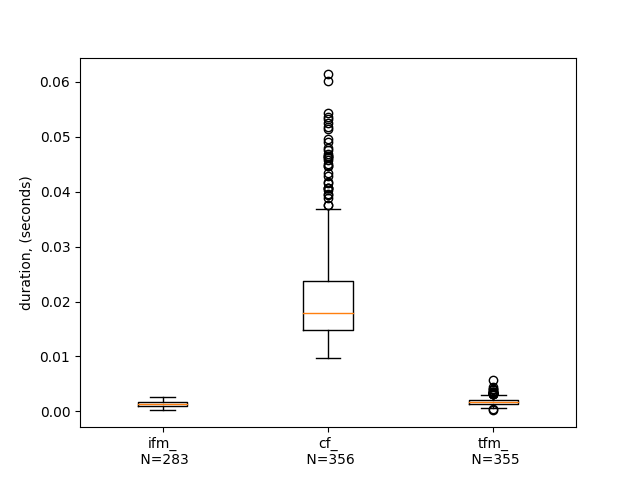

In [30]:
make_parts_boxplot(onerow_per_call, 'duration','seconds')

<IPython.core.display.Javascript object>


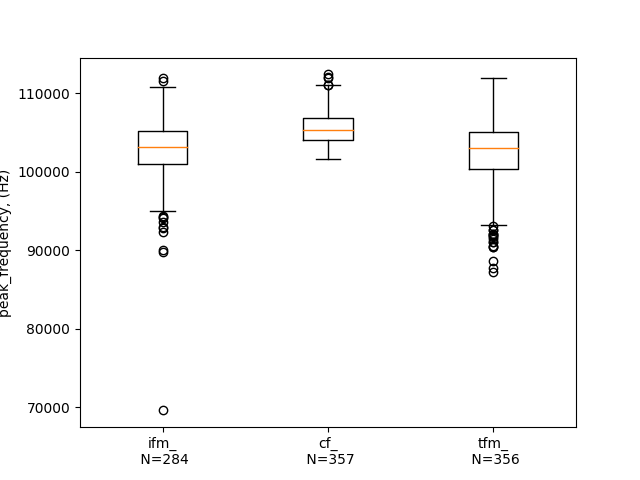

In [31]:
make_parts_boxplot(onerow_per_call, 'peak_frequency','Hz')

<IPython.core.display.Javascript object>


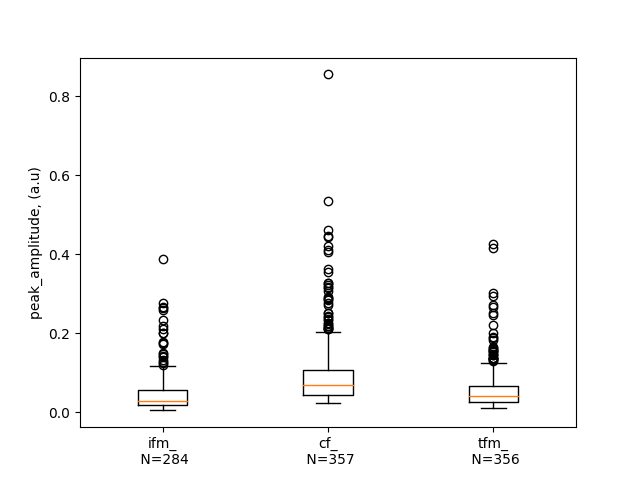

In [32]:
make_parts_boxplot(onerow_per_call, 'peak_amplitude','a.u')

<IPython.core.display.Javascript object>


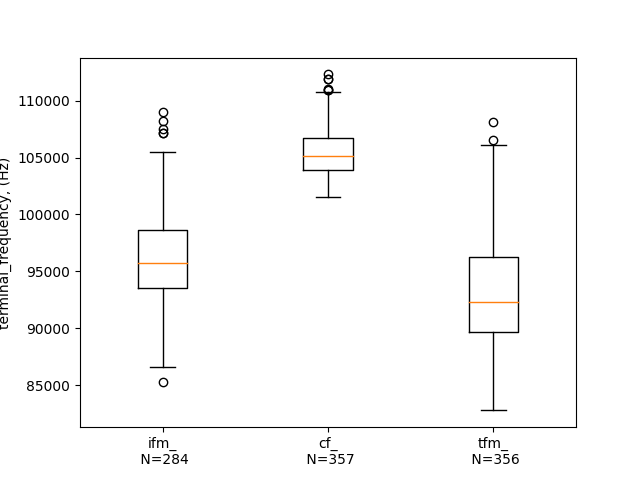

In [33]:
make_parts_boxplot(onerow_per_call, 'terminal_frequency','Hz')

## Verifying the call measurements graphically once more. 
Some call parameters can be easily measured, but need to be verified once more to be sure that they are reliable. For instance, terminal frequency is easily measured, but is sensitive to the presence of reverberation and the first harmonic. In some calls, the -10dB terminal  frequency is actually being picked up at the first harmonic, or where the reverberation of other FM bat calls are. These particular measures need to be eliminated from the measurements. 

In [34]:
onerow_per_call

,ifm_terminal_frequency,ifm_peak_amplitude,ifm_region_id,ifm_stop,ifm_duration,ifm_rms,ifm_peak_frequency,ifm_start,ifm_peak_freq_resolution,cf_terminal_frequency,...,tfm_peak_frequency,tfm_start,tfm_peak_freq_resolution,audio_file,terminal_frequency_threshold,video_annot_id,num_bats,0,duration,peak_freq_resolution
0,93830.334190,0.259338,fm1,0.001556,0.001556,0.125976,103470.437018,0.000000,1282.051282,105705.842237,...,93267.882188,0.019152,700.280112,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_100,2,NaN,NaN,NaN
1,102803.738318,0.019897,fm1,0.002048,0.000428,0.009964,107476.635514,0.001620,4629.629630,107869.142352,...,91098.169717,0.020144,830.564784,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_101,1,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105184.121180,...,103675.450763,0.016604,692.520776,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_102,1,NaN,NaN,NaN
3,95756.880734,0.263123,fm1,0.002412,0.001744,0.149708,103211.009174,0.000668,1141.552511,106966.145833,...,102966.841187,0.017772,871.080139,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_104,1,NaN,NaN,NaN
4,99856.321839,0.043701,fm1,0.002440,0.001392,0.016833,104885.057471,0.001048,1428.571429,107272.982063,...,107416.879795,0.016712,1275.510204,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_106,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,85294.117647,0.008911,fm1,0.000448,0.000340,0.004141,102941.176471,0.000108,5813.953488,102085.781434,...,102582.496413,0.014064,716.332378,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_61,1,NaN,NaN,NaN
353,86580.086580,0.036652,fm1,0.002216,0.001848,0.017552,89826.839827,0.000368,1077.586207,101832.399627,...,87772.397094,0.019352,1207.729469,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_85,1,NaN,NaN,NaN
354,93342.036554,0.027985,fm1,0.001984,0.001532,0.016604,95953.002611,0.000452,1302.083333,105600.539811,...,104343.220339,0.013840,1054.852321,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_90,1,NaN,NaN,NaN
355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105111.008326,...,99264.705882,0.018868,915.750916,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_91,1,NaN,NaN,NaN


In [35]:
import correct_bad_segs.re_measure_bad_segs as rmbg

In [36]:
def plot_call_parameters(one_call_msmts, audio_folder='../hp_ind_calls/'):
    '''
    Assumes each call measurement to have ifm, cf and tfm regions, along with their start, stop and other emasurements 

    '''
    df = one_call_msmts.to_frame().T.reset_index(drop=True)
   
    audio, fs = rmbg.load_audio_from_call_region(df, audio_folder)
    plt.figure()
    ax = plt.subplot(111)
    itsfm.make_specgram(audio,fs)
    
    for region in  ['ifm_','tfm_', 'cf_']:
        plot_region_measurements(df, region, fs)
    plt.title(one_call_msmts['video_annot_id'])
    
def plot_region_measurements(df, region, fs):
    '''
    Parameters
    ----------
    df : pd.DataFrame
        one row per call measurements 
    region : str, one of ['ifm_','tfm_', 'cf_']
        The entry should be one of the above only. 
    
    '''
    # start and stop of region 
    start, stop = df[region+'start'], df[region+'stop']
    plt.vlines([start,stop], 0, fs*0.5)
    # plot peak frequency:
    peak_f = df[region+'peak_frequency']
    plt.hlines(peak_f, start, stop, 'r')
    # terminal frequency 
    terminal_f = df[region+'terminal_frequency']
    plt.hlines(terminal_f, start, stop, 'g', linestyles='dashed')
    
    
    
    

In [37]:
onerow_per_call.shape

(357, 34)

### Last round of call removals
Remove a few more calls for the last time before starting the stastical analysis. 

In [38]:
delete_list = ['Aditya_2018-08-17_12_100',
               'Aditya_2018-08-17_45_114',
              'Aditya_2018-08-17_45_117']

final_onerow_per_call = onerow_per_call.copy()
for each in delete_list:
    final_onerow_per_call = final_onerow_per_call[final_onerow_per_call['video_annot_id'] != each]

### Using kernel density estimates to calculate call property overlap
I'm now thinking of using kernel density estimates (KDE) instead to quantify and compare the call property distributions. KDEs are neat because they provide a one-shot answer to how much overlap single and multi context bat calls are. A multi-variate KDE is made for each group's bat calls, and then the overalp is calcualted through an integration. If there is large overlap --> the call properties are the same, otherwise, they are not! 


In [39]:
from shuffle_overlap import shuffle_overlap

In [40]:
final_onerow_per_call.columns

Index([      'ifm_terminal_frequency',           'ifm_peak_amplitude',
                      'ifm_region_id',                     'ifm_stop',
                       'ifm_duration',                      'ifm_rms',
                 'ifm_peak_frequency',                    'ifm_start',
           'ifm_peak_freq_resolution',        'cf_terminal_frequency',
                  'cf_peak_amplitude',                 'cf_region_id',
                            'cf_stop',                  'cf_duration',
                             'cf_rms',            'cf_peak_frequency',
                           'cf_start',      'cf_peak_freq_resolution',
             'tfm_terminal_frequency',           'tfm_peak_amplitude',
                      'tfm_region_id',                     'tfm_stop',
                       'tfm_duration',                      'tfm_rms',
                 'tfm_peak_frequency',                    'tfm_start',
           'tfm_peak_freq_resolution',                   'audio_file',
      

In [41]:
import datetime as dt
timenow = dt.datetime.now()


In [42]:
final_onerow_per_call['ifm-cf_dbratio'] = dB(final_onerow_per_call['ifm_rms']/final_onerow_per_call['cf_rms'])
final_onerow_per_call['tfm-cf_dbratio'] = dB(final_onerow_per_call['tfm_rms']/final_onerow_per_call['cf_rms'])
final_onerow_per_call['ifm-peak_db'] = dB(final_onerow_per_call['ifm_peak_amplitude'])
final_onerow_per_call['tfm-peak_db'] = dB(final_onerow_per_call['tfm_peak_amplitude'])
final_onerow_per_call['tfm_dbrms'] = dB(final_onerow_per_call['tfm_rms'])
final_onerow_per_call['ifm_dbrms'] = dB(final_onerow_per_call['ifm_rms'])
final_onerow_per_call['cf_dbrms'] = dB(final_onerow_per_call['cf_rms'])
final_onerow_per_call['cf-peak_db'] = dB(final_onerow_per_call['cf_peak_amplitude'])




In [43]:
final_onerow_per_call.to_csv('one_call_per_row_'+str(timenow.date())+'.csv')

In [44]:
single_onerow_per_call = final_onerow_per_call[final_onerow_per_call['num_bats']==1]
multi_onerow_per_call = final_onerow_per_call[final_onerow_per_call['num_bats']>1]

In [45]:
np.max(final_onerow_per_call['cf_peak_freq_resolution'])

204.2483660130719

<IPython.core.display.Javascript object>


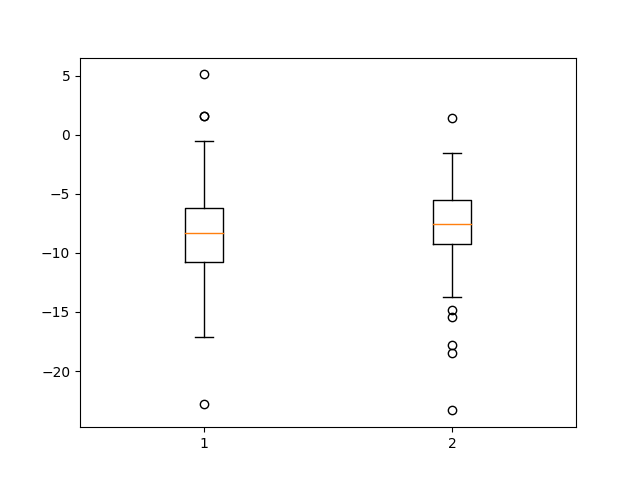

In [46]:
col = 'ifm-cf_dbratio'
plt.figure()
plt.boxplot([shuffle_overlap.remove_nans(single_onerow_per_call[col]),
            shuffle_overlap.remove_nans(multi_onerow_per_call[col])]);

<IPython.core.display.Javascript object>


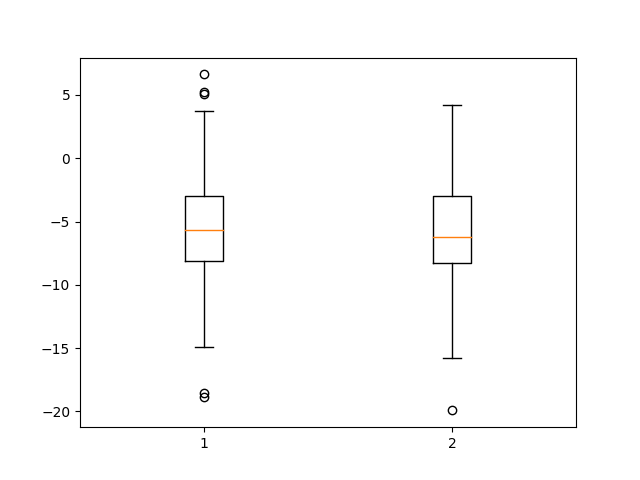

In [47]:
col = 'tfm-cf_dbratio'
plt.figure()
plt.boxplot([shuffle_overlap.remove_nans(single_onerow_per_call[col]),
            shuffle_overlap.remove_nans(multi_onerow_per_call[col])]);

In [48]:
import tqdm

In [49]:
all_cols = ['ifm_duration','ifm_terminal_frequency',
            'tfm_duration','tfm_terminal_frequency', 
            'ifm-peak_db','tfm-peak_db', # FM peak ampliture 
            'ifm_dbrms','tfm_dbrms', # FM rms
            'cf_peak_frequency', 'cf_duration', 'cf_dbrms', 'cf-peak_db',
           'ifm-cf_dbratio', 'tfm-cf_dbratio'] 

all_observed_pctiles = []
for col_name in tqdm.tqdm(all_cols):
    print(col_name)
    data_overlap, outputs, shuffled_overlaps = shuffle_overlap.overlap_w_shuffling(single_onerow_per_call[col_name],
                                                                               multi_onerow_per_call[col_name])
    observed_percentile = shuffle_overlap.percentile_score_of_value(data_overlap, shuffled_overlaps)
    all_observed_pctiles.append(observed_percentile)

  0%|          | 0/14 [00:00<?, ?it/s]

ifm_duration


  7%|▋         | 1/14 [00:23<05:00, 23.11s/it]

ifm_terminal_frequency


 14%|█▍        | 2/14 [00:46<04:36, 23.08s/it]

tfm_duration


 21%|██▏       | 3/14 [01:17<04:41, 25.60s/it]

tfm_terminal_frequency


 29%|██▊       | 4/14 [01:47<04:29, 26.99s/it]

ifm-peak_db


 36%|███▌      | 5/14 [02:10<03:50, 25.57s/it]

tfm-peak_db


 43%|████▎     | 6/14 [02:37<03:29, 26.19s/it]

ifm_dbrms


 50%|█████     | 7/14 [02:59<02:54, 24.92s/it]

tfm_dbrms


 57%|█████▋    | 8/14 [03:26<02:33, 25.60s/it]

cf_peak_frequency


 64%|██████▍   | 9/14 [03:53<02:10, 26.05s/it]

cf_duration


 71%|███████▏  | 10/14 [04:20<01:45, 26.34s/it]

cf_dbrms


 79%|███████▊  | 11/14 [04:48<01:19, 26.63s/it]

cf-peak_db


 86%|████████▌ | 12/14 [05:15<00:53, 26.78s/it]

ifm-cf_dbratio


 93%|█████████▎| 13/14 [05:37<00:25, 25.36s/it]

tfm-cf_dbratio


100%|██████████| 14/14 [06:04<00:00, 26.04s/it]


In [50]:
variables_and_observations = pd.DataFrame(data={'measured_variables':all_cols,
                                                'observed_overlap_percentile':all_observed_pctiles})
                                          
variables_and_observations.sort_values('observed_overlap_percentile')

,measured_variables,observed_overlap_percentile
2,tfm_duration,9.84
7,tfm_dbrms,18.08
11,cf-peak_db,26.92
5,tfm-peak_db,28.84
10,cf_dbrms,31.44
12,ifm-cf_dbratio,31.76
9,cf_duration,36.44
6,ifm_dbrms,55.76
13,tfm-cf_dbratio,65.08
4,ifm-peak_db,69.64


### How to interpret the overlap percentile:
The overlap percentile is an indicator of where the observed single-multi bat calls overlap fits into the overall distribution made of shuffled data. If the overlap percentile is high, it hints that the observed overlap is close to the shuffled distribution. If the overlap percentile is low, it hints that the observed overlap is *less* than the shuffled overlap distribution. 

When the observed overlap percentile is *high*, it actually indicates that there may be no difference between the observed and shuffled distributions. When the observed overlap is *low* however, it indicates that the two distributions may actually be different. 

### Many tested parameters don't seem to differ much between the single and multi bat contexts
The overlap percentile is fairly high (~18-97 %ile) for most of the parameters tested. This suggests that the difference may not be very large between the two distributions. 

- ### The CF received levels seem to be different between single and multi bat calls. The exact overlap percentile observed will vary according to the exact seed used (set in the ```np.random.seed``` cell at the top of the notebook), but I've seen that the overall trends remain the same, with the overlap percentile of both cf_rms and cf_peak_amplitude remaining ~11 percentile. 
- ### The tFM duration of multi bat calls is a bit longer as can be seen in the plot below. The overlap percentile for tfm duration is also ~11 %ile.



In [51]:
multi_onerow_per_call.shape

(94, 42)

In [52]:
single_onerow_per_call.shape

(261, 42)

<IPython.core.display.Javascript object>


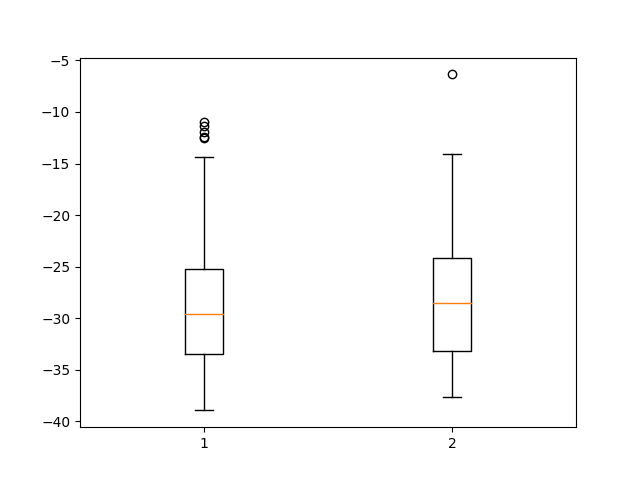

In [53]:
plt.figure()
plt.boxplot([dB(single_onerow_per_call['cf_rms']), dB(multi_onerow_per_call['cf_rms'])]);

<IPython.core.display.Javascript object>


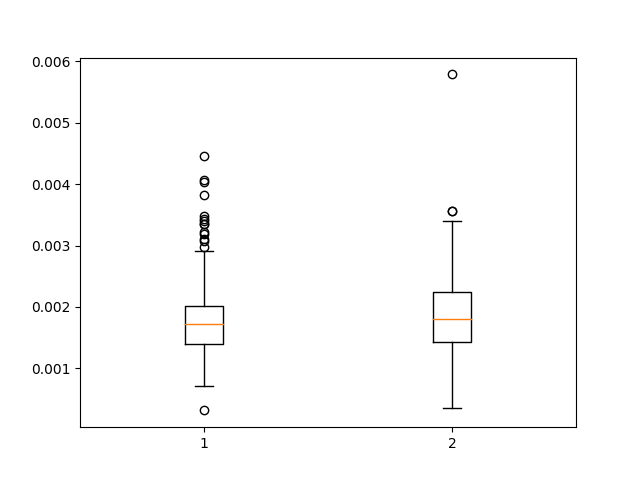

In [54]:
col = 'tfm_duration'
plt.figure()
plt.boxplot( [shuffle_overlap.remove_nans(single_onerow_per_call[col]),
              shuffle_overlap.remove_nans(multi_onerow_per_call[col])]);

<IPython.core.display.Javascript object>


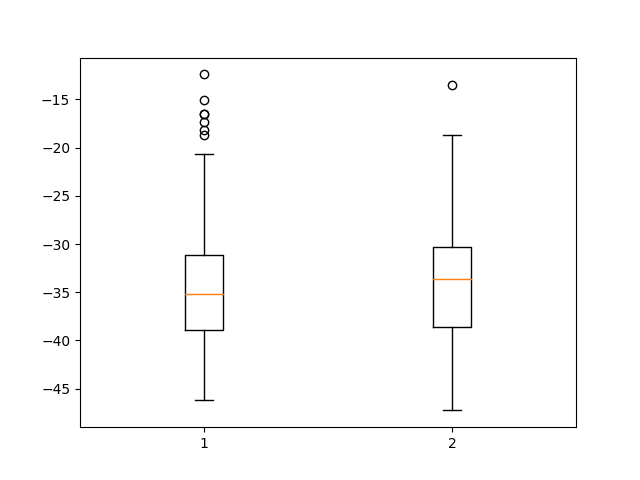

In [55]:
col = 'tfm_rms'
plt.figure()
plt.boxplot( [dB(shuffle_overlap.remove_nans(single_onerow_per_call[col])),
              dB(shuffle_overlap.remove_nans(multi_onerow_per_call[col]))]);

In [56]:
kwargs = {}

In [57]:
col_name = 'cf_peak_frequency'
main_distbn = multi_onerow_per_call[col_name]
other_distbn = single_onerow_per_call[col_name]

0.09055463350851595 0.00013593129706899592


<IPython.core.display.Javascript object>


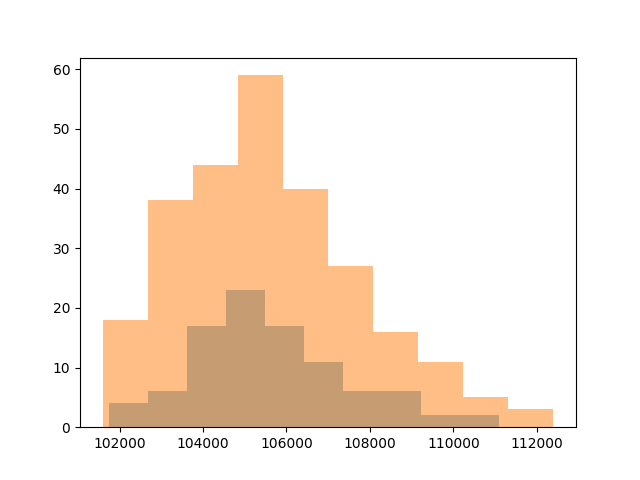

(array([18., 38., 44., 59., 40., 27., 16., 11.,  5.,  3.]),
 array([101591.25351808, 102671.94569641, 103752.63787474, 104833.33005307,
        105914.02223141, 106994.71440974, 108075.40658807, 109156.0987664 ,
        110236.79094474, 111317.48312307, 112398.1753014 ]),
 <a list of 10 Patch objects>)

In [58]:

main_distbn = shuffle_overlap.remove_nans(main_distbn)
other_distbn = shuffle_overlap.remove_nans(other_distbn)
main_kde = shuffle_overlap.generate_kde(main_distbn, **kwargs)
other_kde = shuffle_overlap.generate_kde(other_distbn, **kwargs)

# calculate overlap between the two KDEs by integrating between the global min and max values
global_min, global_max = shuffle_overlap.get_global_minmax(main_distbn, other_distbn)

# calculate the pdf over the global min-max
minmax_range = np.linspace(global_min, global_max, kwargs.get('num_points', 1000))
main_pdf = main_kde.evaluate(minmax_range)
other_pdf = other_kde.evaluate(minmax_range)

# overlap 
overlap = np.sum(np.sqrt(main_pdf*other_pdf))


# overlap vs integral 
integ = main_kde.integrate_kde(other_kde)

print(overlap,integ)

plt.figure()
plt.hist(main_distbn, alpha=0.5)
plt.hist(other_distbn, alpha=0.5)


In [59]:
print(f"Notebook run end at : {dt.datetime.now()}")

Notebook run end at : 2020-07-10 19:42:12.653889


## References

- #### [1] Beleyur, T, 2020, itsfm: Identify, Track and Segment Sound (by) Frequency and its Modulation, python package, documentation at https://itsfm.readthedocs.io/en/latest/
